#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y Analitica de Datos**
###Tecnológico de Monterrey
###Prof Maria de la Paz Rico Fernandez

## **Reto: primer entregable**
###**Aguas superficiales**

## **Nombres y matrículas de los integrantes del equipo:**

### **Jose Santiago Rueda Antonio**

Matricula: A01794118

### **Roberto Santiago Oliva**

Matricula: A01374957

In [ ]:
import pandas as pd
import numpy as np
import requests, zipfile
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd

In [ ]:
df_superf = pd.read_csv('https://drive.google.com/uc?id=1-kiPH9HsEGax_mt-u7lXLghMhEGlQNH4', sep=',',encoding = "ISO-8859-1")
df_superf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
# Creamos una copia para trabajar sobre ella sin temor a editarla y no poder tener la original:

df_sup = df_superf.copy()
df_sup.describe()

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
count,3493.000000,3493.000000,3493.0,0.0,0.0,0.0,0.0
mean,-100.359969,21.046992,2020.0,NaN,NaN,NaN,NaN
std,6.122773,3.893696,0.0,NaN,NaN,NaN,NaN
min,-117.124030,14.534910,2020.0,NaN,NaN,NaN,NaN
25%,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
50%,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
75%,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
max,-86.732150,32.706500,2020.0,NaN,NaN,NaN,NaN


In [ ]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   float64
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [ ]:
df_sup.isnull().sum()

CLAVE                      648
SITIO                      648
ORGANISMO_DE_CUENCA        648
ESTADO                     648
MUNICIPIO                  648
CUENCA                     649
CUERPO DE AGUA             662
TIPO                       648
SUBTIPO                    662
LONGITUD                   648
LATITUD                    648
PERIODO                    648
DBO_mg/L                  1560
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
SST_mg/L                   652
CALIDAD_SST                652
COLI_FEC_NMP_100mL        1559
CALIDAD_COLI_FEC          1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
ENTEROC_NMP_100mL         3237
CALIDAD_ENTEROC           3237
OD_PORC                   2344
CALIDAD_OD_PORC           2344
OD_PORC_SUP               2522
CALIDAD_OD_PORC_SUP       2522
OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
OD_PORC_FON               3195
CALIDAD_OD_PORC_FON       3195
TOX_D_48

In [ ]:
# Vamos a ver el numero de campos vacios de forma descendente:

df_sup.isna().sum().sort_values(ascending=False)

CALIDAD_TOX_FIS_FON_15    4141
TOX_FIS_FON_15_UT         4141
CALIDAD_TOX_D_48_FON      4141
TOX_D_48_FON_UT           4141
CALIDAD_OD_PORC_MED       3654
OD_PORC_MED               3654
CALIDAD TOX_D_48_SUP      3379
TOX_D_48_SUP_UT           3379
CALIDAD_ENTEROC           3237
ENTEROC_NMP_100mL         3237
CALIDAD_OD_PORC_FON       3195
OD_PORC_FON               3195
CALIDAD_OD_PORC_SUP       2522
OD_PORC_SUP               2522
TOX_FIS_SUP_15_UT         2467
CALIDAD_TOX_FIS_SUP_15    2467
CALIDAD_OD_PORC           2344
OD_PORC                   2344
TOX_D_48_UT               2325
CALIDAD_TOX_D_48          2325
CALIDAD_TOX_V_15          2322
TOX_V_15_UT               2322
CONTAMINANTES             1915
CALIDAD_DQO               1560
DQO_mg/L                  1560
CALIDAD_DBO               1560
DBO_mg/L                  1560
COLI_FEC_NMP_100mL        1559
E_COLI_NMP_100mL          1559
CALIDAD_E_COLI            1559
CALIDAD_COLI_FEC          1559
CUERPO DE AGUA             662
SUBTIPO 

In [ ]:
df_sup.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [ ]:
# Media de las variables numericas:
df_sup.mean(numeric_only=True)

LONGITUD                  -100.359969
LATITUD                     21.046992
PERIODO                   2020.000000
TOX_D_48_FON_UT                   NaN
CALIDAD_TOX_D_48_FON              NaN
TOX_FIS_FON_15_UT                 NaN
CALIDAD_TOX_FIS_FON_15            NaN
dtype: float64

In [ ]:
# Moda de las variables numericas:
df_sup.mode(numeric_only=True, axis="index").iloc[0]

LONGITUD                  -105.25951
LATITUD                     14.61567
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
Name: 0, dtype: float64

In [ ]:
# Mediana de las variables numericas:
df_sup.median(numeric_only=True, axis = 0)

LONGITUD                   -99.79553
LATITUD                     20.14898
PERIODO                   2020.00000
TOX_D_48_FON_UT                  NaN
CALIDAD_TOX_D_48_FON             NaN
TOX_FIS_FON_15_UT                NaN
CALIDAD_TOX_FIS_FON_15           NaN
dtype: float64

In [ ]:
# Deciles, Percentiles y Cuantiles de las variables numericas:
df_sup.quantile([.10, .25, .50, .75, .90])

,LONGITUD,LATITUD,PERIODO,TOX_D_48_FON_UT,CALIDAD_TOX_D_48_FON,TOX_FIS_FON_15_UT,CALIDAD_TOX_FIS_FON_15
0.10,-109.028054,16.758854,2020.0,NaN,NaN,NaN,NaN
0.25,-103.882310,18.396070,2020.0,NaN,NaN,NaN,NaN
0.50,-99.795530,20.148980,2020.0,NaN,NaN,NaN,NaN
0.75,-96.860230,22.828930,2020.0,NaN,NaN,NaN,NaN
0.90,-92.860992,26.543028,2020.0,NaN,NaN,NaN,NaN


In [ ]:
#Observamos que hay 4 columnas que no contienen nada de informacion y 1 de tipo integer, por lo que las eliminaremos:

df_sup2 = df_sup.drop(["CALIDAD_TOX_FIS_FON_15", "TOX_FIS_FON_15_UT", "CALIDAD_TOX_D_48_FON", "TOX_D_48_FON_UT", "PERIODO"], axis = 1)
df_sup2.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
# Revisamos de nuevo y vemos que ya no tenemos las columnas sin valores:
df_sup2.isna().sum().sort_values(ascending=False)

OD_PORC_MED               3654
CALIDAD_OD_PORC_MED       3654
CALIDAD TOX_D_48_SUP      3379
TOX_D_48_SUP_UT           3379
CALIDAD_ENTEROC           3237
ENTEROC_NMP_100mL         3237
CALIDAD_OD_PORC_FON       3195
OD_PORC_FON               3195
CALIDAD_OD_PORC_SUP       2522
OD_PORC_SUP               2522
TOX_FIS_SUP_15_UT         2467
CALIDAD_TOX_FIS_SUP_15    2467
OD_PORC                   2344
CALIDAD_OD_PORC           2344
TOX_D_48_UT               2325
CALIDAD_TOX_D_48          2325
TOX_V_15_UT               2322
CALIDAD_TOX_V_15          2322
CONTAMINANTES             1915
CALIDAD_DBO               1560
DQO_mg/L                  1560
CALIDAD_DQO               1560
DBO_mg/L                  1560
CALIDAD_E_COLI            1559
E_COLI_NMP_100mL          1559
CALIDAD_COLI_FEC          1559
COLI_FEC_NMP_100mL        1559
SUBTIPO                    662
CUERPO DE AGUA             662
CALIDAD_SST                652
SST_mg/L                   652
CUENCA                     649
CUMPLE_C

In [ ]:
# Para efectos de agrupacion, vamos a separar el df por el color del semaforo, ademas de que esto nos ayudara en nuestra siguiente entrega:
df_sup2_verde = pd.DataFrame(df_sup2[df_sup2['SEMAFORO'] == 'Verde'])
df_sup2_rojo = pd.DataFrame(df_sup2[df_sup2['SEMAFORO'] == 'Rojo'])
df_sup2_amarillo = pd.DataFrame(df_sup2[df_sup2['SEMAFORO'] == 'Amarillo'])

In [ ]:
# Semaforo Verde:
df_sup2_verde.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
# Semaforo Amarillo:
df_sup2_amarillo.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
8,DLBAJ109,MANANTIAL SAN REGIS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,LOTICO,ARROYO,-110.22379,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
9,DLBAJ112,AGUA CALIENTE II,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SANTIAGO,SANTIAGO,LOTICO,ARROYO,-109.80786,...,"OD%L,",SI,SI,SI,SI,SI,ND,NO,SI,LOTICO
10,DLBAJ120M1,BOCA DE LA SIERRA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),ARROYO,-109.82610,...,"CF,",SI,SI,SI,NO,SI,ND,SI,SI,LOTICO
11,DLBAJ121,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,LAS POCITAS-SAN HILARIO,HUMEDAL OASIS DE LA SIERRA EL PILAR 1,LOTICO (HUMEDAL),ARROYO,-110.95153,...,"CF,OD%L,",SI,SI,SI,NO,SI,ND,NO,SI,LOTICO
13,DLBAJ124,MANANTIAL CADUAÑO,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,SAN JOSE DEL CABO,LOTICO (HUMEDAL),CANAL,-109.77912,...,"CF,E_COLI,",SI,SI,SI,NO,NO,ND,ND,SI,LOTICO


In [ ]:
# Semaforo Rojo:
df_sup2_rojo.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
7,DLBAJ106W2,LAGUNA TODOS SANTOS - CENTRO DE LA LAGUNA,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,TODOS SANTOS,COSTERO,LAGUNA,-110.23902,...,"ENT_FEC,OD%F,",ND,ND,SI,ND,ND,NO,NO,SI,COSTERO
35,DLBAJ160,"PLAYA SANTA ROSALIA SEG23, 1 ISA8A",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,MULEGE,SANTA ROSALIA,GOLFO DE CALIFORNIA,COSTERO,OCEANO-MAR,-112.26933,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO
58,DLBAJ194,RIO LA PURISIMA 2,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,MEZQUITAL SECO,RIO LA PURISIMA,LOTICO (HUMEDAL),ARROYO,-112.12748,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,ND,SI,LOTICO
59,DLBAJ195,BAHIA MAGDALENA (PUERTO ADOLFO LOPEZ MATEOS),PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,COMONDU,LA PURISIMA,BAHIA MAGDALENA,COSTERO,BAHIA,-112.12343,...,"ENT_FEC,",ND,ND,SI,ND,ND,NO,SI,SI,COSTERO


### **Limpiamos la base de datos para convertir todos los valores a tipo float además de rellenar aquellos N/A por su media:**

In [ ]:
green = list()
red = list()
yellow = list()
names = list()

def CleanValues(df_clean, array_columns, list_clean):

  for i in array_columns:
  
    df_clean[i] = df_clean[i].astype('str')
    df_clean[i] = df_clean[i].str.replace('<25','25',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.2','0.2',regex=True)
    df_clean[i] = df_clean[i].str.replace('<1','1',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<2','2',regex=True)
    df_clean[i] = df_clean[i].str.replace('<3','3',regex=True)  
    df_clean[i] = df_clean[i].str.replace('<20','20',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<1.1','1.1',regex=True)
    df_clean[i] = df_clean[i].str.replace('<10','10',regex=True)
    df_clean[i] = df_clean[i].str.replace('<0.02','0.02',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.01','0.01',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.003','0.003',regex=True)
    df_clean[i] = df_clean[i].str.replace('<0.005','0.004',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.0005','0.0004',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.0015','0.0015',regex=True) 
    df_clean[i] = df_clean[i].str.replace('<0.025','0.025',regex=True) 
    df_clean[i]= df_clean[i].astype('float')
    mean_a = df_clean[i].mean()
    df_clean[i] = df_clean[i].replace(np.nan,mean_a)
    list_clean.append(mean_a)
    names.append(i)

REP = ['DBO_mg/L', 'DQO_mg/L', 'SST_mg/L', 'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL', 'ENTEROC_NMP_100mL', 'OD_PORC', 'OD_PORC_SUP', 'OD_PORC_MED', 'OD_PORC_FON', 'TOX_D_48_UT', 'TOX_V_15_UT', 'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT',]

CleanValues(df_sup2_verde, REP, green)
CleanValues(df_sup2_rojo, REP, red)
CleanValues(df_sup2_amarillo, REP, yellow)

In [ ]:
print(df_sup2_verde)
print(df_sup2_rojo)
print(df_sup2_amarillo)

            CLAVE                                              SITIO  \
1        DLBAJ100                         LOS CABOS SEG 22, 2 ISA10B   
2        DLBAJ101                         LOS CABOS SEG 22, 1 ISA10B   
3        DLBAJ102                                        LOS CABOS 3   
4        DLBAJ103                                        LOS CABOS 1   
5        DLBAJ104                               BAHIA CABO SAN LUCAS   
...           ...                                                ...   
3455  OCRBR5119M1                             LAGUNA MADRE HUMEDAL 6   
3456  OCRBR5120M1                             LAGUNA MADRE HUMEDAL 7   
3480  OCRBR5183M1  SITIO 1, CANAL DE LLAMADA TOMA NORTE MUESTRA S...   
3486  OCRBR5202M1                       PRESA INTERNACIONAL FALCON 6   
3487  OCRBR5205M1                       PRESA INTERNACIONAL FALCON 9   

               ORGANISMO_DE_CUENCA               ESTADO      MUNICIPIO  \
1     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR      

In [ ]:
# Unimos los 3 df:
df_super_clean = pd.concat([df_sup2_verde, df_sup2_rojo, df_sup2_amarillo],join='inner')
df_super_clean.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
5,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
df_super_clean.shape[0] 

3493

In [ ]:
# Borramos las columnas con nan del mas del 50% en los datos:
df_super_clean.drop('CALIDAD_OD_PORC_MED',axis=1,inplace=True)
df_super_clean.drop('CALIDAD TOX_D_48_SUP',axis=1,inplace=True)
df_super_clean.drop('CALIDAD_ENTEROC',axis=1,inplace=True)
df_super_clean.drop('CALIDAD_OD_PORC_FON',axis=1,inplace=True)
df_super_clean.drop('CALIDAD_OD_PORC_SUP',axis=1,inplace=True)
df_super_clean.drop('CALIDAD_TOX_FIS_SUP_15',axis=1,inplace=True)

In [ ]:
names = df_super_clean.columns.to_list()

In [ ]:
types = df_super_clean.dtypes.to_dict()
df_super_clean = pd.DataFrame(SimpleImputer(strategy='most_frequent').fit_transform(df_super_clean),columns=names).astype(types)

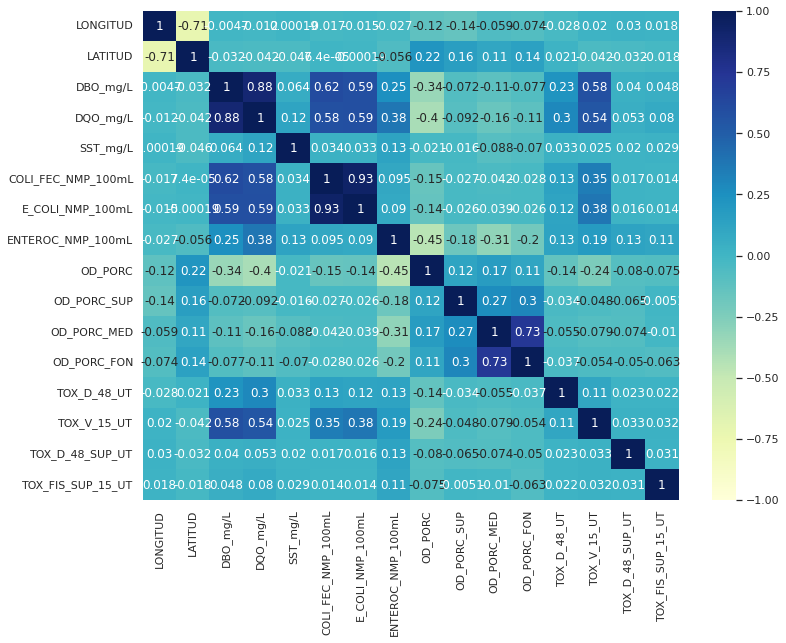

In [ ]:
df_super_clean.corr()

sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(df_super_clean.corr(), vmin = -1, vmax = 1, annot= True, cmap= "YlGnBu")

## **K-Mean analisis:**

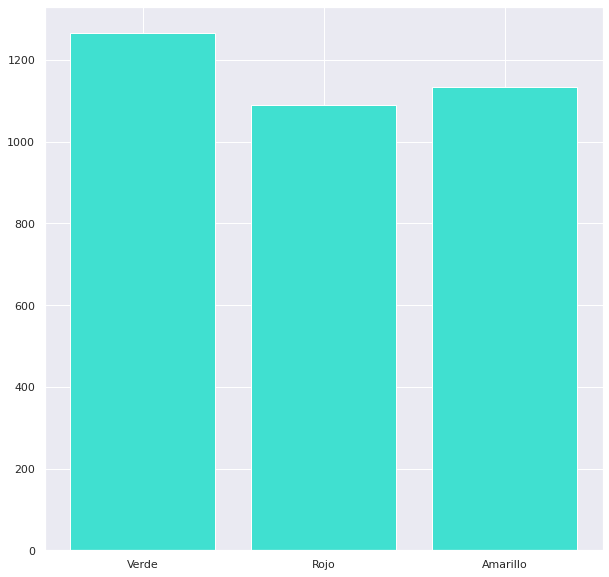

In [ ]:
# Observemos graficamente el df por semaforo:
sns.set(rc={'figure.figsize':(10,10)})
y = df_super_clean['SEMAFORO']
c = Counter(y)
plt.bar(c.keys(), c.values(), color="turquoise")
plt.show()

In [ ]:
# Creamos un nuevo df en el que revisaremos la relacion que tienen la latitud y longitud con la calidad del agua:

df_superf_coord = df_super_clean.copy()

df_superf_coord["Coordinates"] = list(zip(df_superf_coord.LONGITUD, df_superf_coord.LATITUD))
df_superf_coord["Coordinates"] = df_superf_coord["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(df_superf_coord, geometry="Coordinates")
gdf.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO,Coordinates
0,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.84290 22.90473)
1,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.86442 22.89880)
2,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.88604 22.89609)
3,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.89657 22.87694)
4,DLBAJ104,BAHIA CABO SAN LUCAS,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.90250,...,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO,POINT (-109.90250 22.88000)


### Elbow Method:

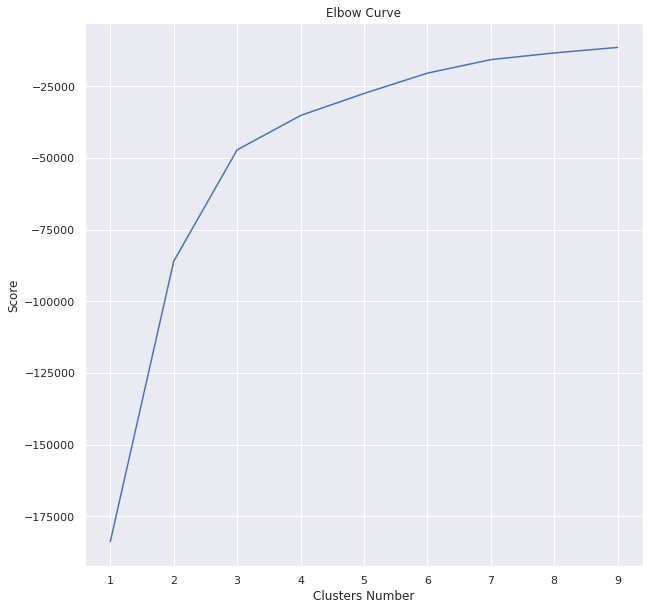

In [ ]:
coord_superf = list(zip(gdf.LONGITUD, gdf.LATITUD))

Cn = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Cn]
kmeans
score = [kmeans[i].fit(coord_superf).score(coord_superf) for i in range(len(kmeans))]
score
plt.plot(Cn,score)
plt.xlabel('Clusters Number')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
df_superf_coord.isna().sum()

CLAVE                  0
SITIO                  0
ORGANISMO_DE_CUENCA    0
ESTADO                 0
MUNICIPIO              0
CUENCA                 0
CUERPO DE AGUA         0
TIPO                   0
SUBTIPO                0
LONGITUD               0
LATITUD                0
DBO_mg/L               0
CALIDAD_DBO            0
DQO_mg/L               0
CALIDAD_DQO            0
SST_mg/L               0
CALIDAD_SST            0
COLI_FEC_NMP_100mL     0
CALIDAD_COLI_FEC       0
E_COLI_NMP_100mL       0
CALIDAD_E_COLI         0
ENTEROC_NMP_100mL      0
OD_PORC                0
CALIDAD_OD_PORC        0
OD_PORC_SUP            0
OD_PORC_MED            0
OD_PORC_FON            0
TOX_D_48_UT            0
CALIDAD_TOX_D_48       0
TOX_V_15_UT            0
CALIDAD_TOX_V_15       0
TOX_D_48_SUP_UT        0
TOX_FIS_SUP_15_UT      0
SEMAFORO               0
CONTAMINANTES          0
CUMPLE_CON_DBO         0
CUMPLE_CON_DQO         0
CUMPLE_CON_SST         0
CUMPLE_CON_CF          0
CUMPLE_CON_E_COLI      0


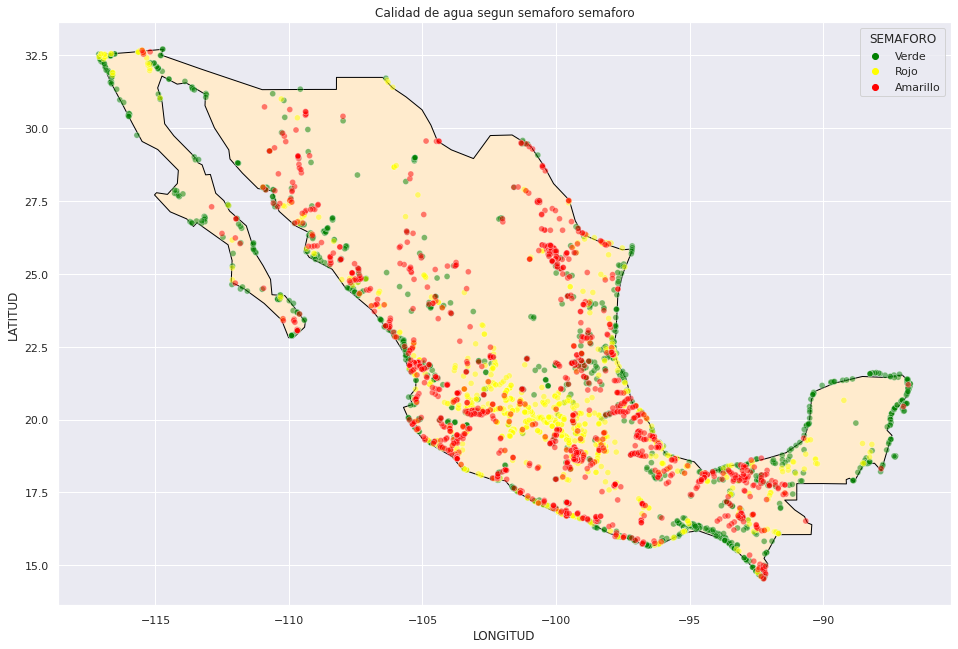

In [ ]:
fig, gax = plt.subplots(figsize=(16,12))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='#FFEBCD')
sns.scatterplot(x='LONGITUD', 
                y='LATITUD', 
                data=df_superf_coord, 
                hue='SEMAFORO', 
                palette=['green', 'yellow', 'red'], 
                alpha=0.5, 
                sizes=(50, 300),
)

plt.title('Calidad de agua segun semaforo semaforo', fontsize=12)
plt.show()